In [1]:
library(tidyverse)
library(readxl)
library(reshape2)
library(Seurat)
library(cowplot)
library(viridis)
library(qs2)
library(ggpubr)
library(future)
plan("multisession", workers =5)
options(future.globals.maxSize = 10*1024^3) # 每个线程分配 10 GB 运行内存

Warning message:
“程序包‘purrr’是用R版本4.4.2 来建造的”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

载入程序包：‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


载入需要的程序包：SeuratObject

载入需要的程序包：sp

Warning message:
“程序包‘sp’是用R版本4.4.2 来建造的”

载入程序包：‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t



载入程序包：‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


载入需要的程序包：viridisLite

qs2 0.1.4


载入程序包：‘ggpubr’


The following object is mask

In [29]:
nFeature_lower <- 500
nFeature_upper <- 10000
nCount_lower <- 1000
nCount_upper <- 100000
pMT_lower <- 0
pMT_upper <- 30
pHB_lower <- 0
pHB_upper <- 5

theme_set(theme_cowplot())

#color scheme
use_colors <- c(
  Tumor = "brown2",
  Normal = "deepskyblue2",
  G1 = "#46ACC8",
  G2M = "#E58601",
  S = "#B40F20",
  Epithelial = "seagreen",
  Immune = "darkgoldenrod2",
  Stromal = "steelblue",
  mess = "black",
  p018 = "#E2D200",
  p019 = "#46ACC8",
  p023 = "#E58601",
  p024 = "#B40F20",
  p027 = "#0B775E",
  p028 = "#E1BD6D",
  p029 = "#35274A",
  p030 = "#F2300F",
  p031 = "#7294D4",
  p032 = "#5B1A18",
  p033 = "#9C964A",
  p034 = "#FD6467")

# Data loading and QC

In [ ]:
### sample list
samples <- read_excel("../data/metadata/patients_metadata.xlsx", range = cell_cols("A:A")) %>% .$sample_id

### import cellranger files from different data sets
for (i in seq_along(samples)){
  assign(paste0("scs_data", i), Read10X(data.dir = paste0("../data/cellranger/", samples[i], "/filtered_feature_bc_matrix")))
}

### create seurat objects from cellranger files
for (i in seq_along(samples)){
  assign(paste0("seu_obj", i), CreateSeuratObject(counts = eval(parse(text = paste0("scs_data", i))), project = samples[i], min.cells = 3))
}

### merge data sets
seu_obj <- merge(seu_obj1, y = c(seu_obj2, seu_obj3, seu_obj4, seu_obj5, seu_obj6, seu_obj7, seu_obj8, seu_obj9, seu_obj10, seu_obj11, seu_obj12, seu_obj13, seu_obj14, seu_obj15, seu_obj16, seu_obj17, seu_obj18, seu_obj19, seu_obj20), add.cell.ids = samples, project = "lung")

## joinLayers合并样本counts和data，我们不进行批次的整合
seu_obj[['RNA']] <- JoinLayers(seu_obj[['RNA']])

seu_obj

An object of class Seurat 
26296 features across 133736 samples within 1 assay 
Active assay: RNA (26296 features, 0 variable features)
 1 layer present: counts

In [4]:
str(seu_obj@meta.data)

'data.frame':	133736 obs. of  3 variables:
 $ orig.ident  : chr  "p018t" "p018t" "p018t" "p018t" ...
 $ nCount_RNA  : num  6432 1583 2603 2077 2637 ...
 $ nFeature_RNA: int  2439 843 1188 1011 1213 1848 1486 1954 923 1118 ...


In [5]:
### calculate mitochondrial, hemoglobin and ribosomal gene counts
seu_obj <- PercentageFeatureSet(seu_obj, pattern = "^MT-", col.name = "pMT")
seu_obj <- PercentageFeatureSet(seu_obj, pattern = "^HBA|^HBB", col.name = "pHB")
seu_obj <- PercentageFeatureSet(seu_obj, pattern = "^RPS|^RPL", col.name = "pRP")

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”
Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”
Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



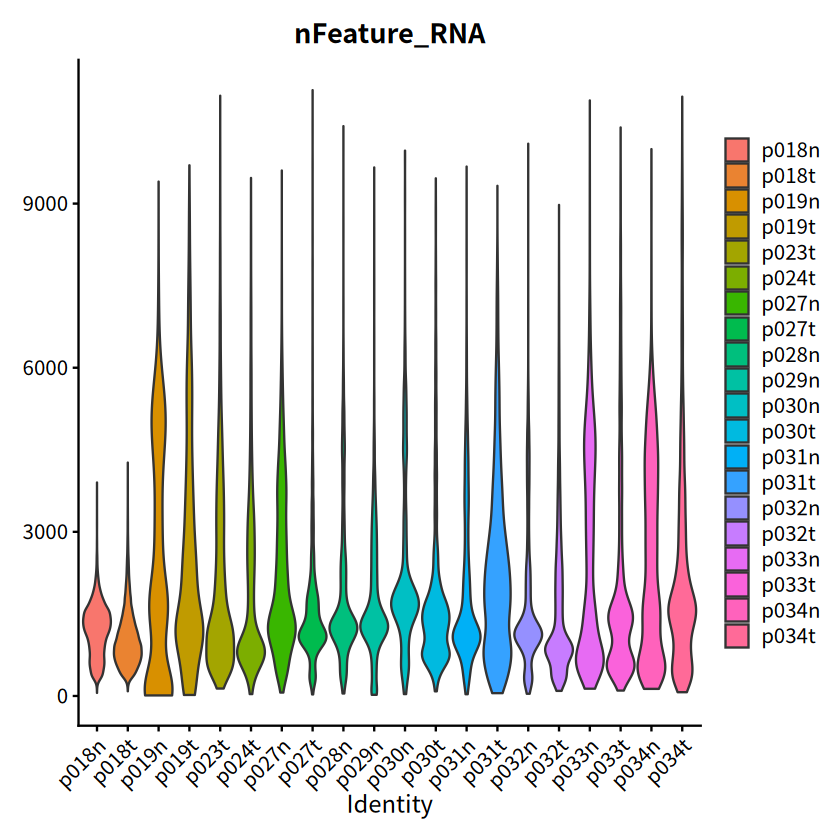

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”
Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



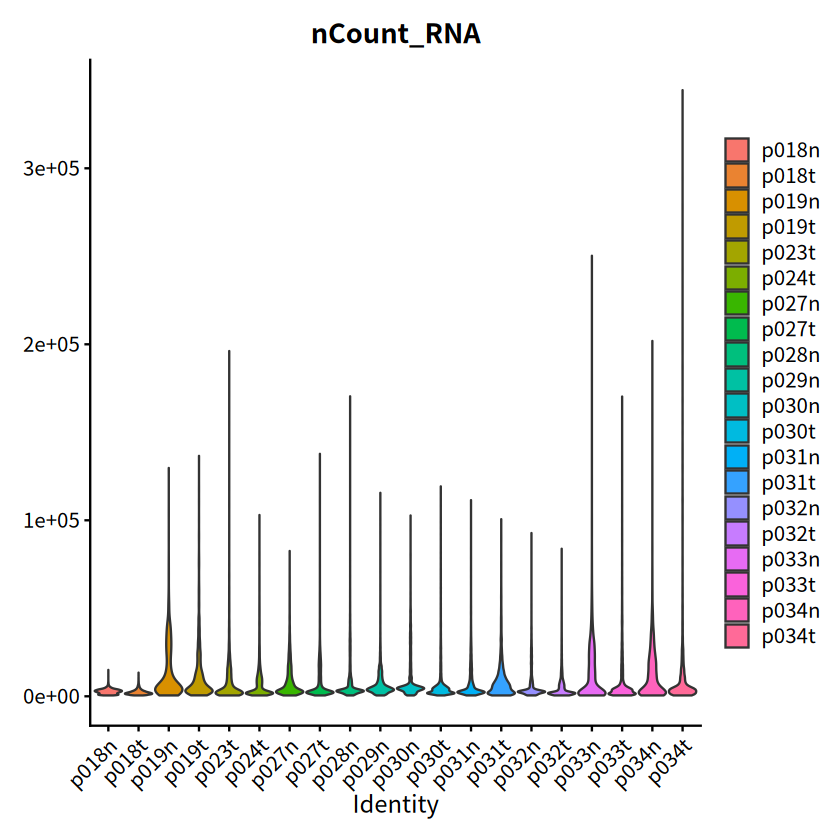

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”
Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



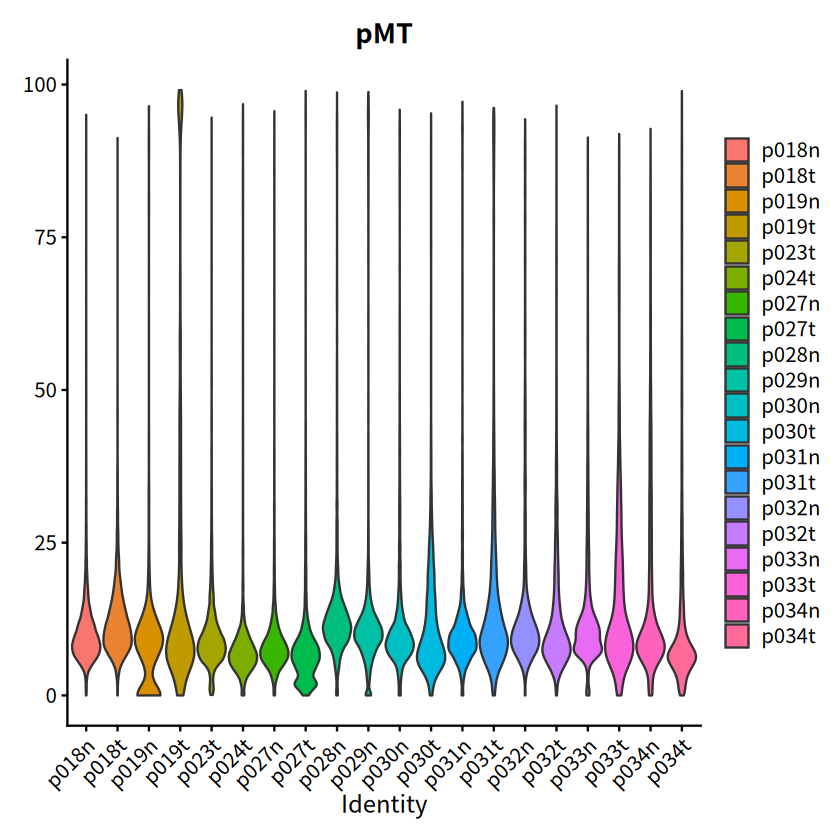

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”
Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



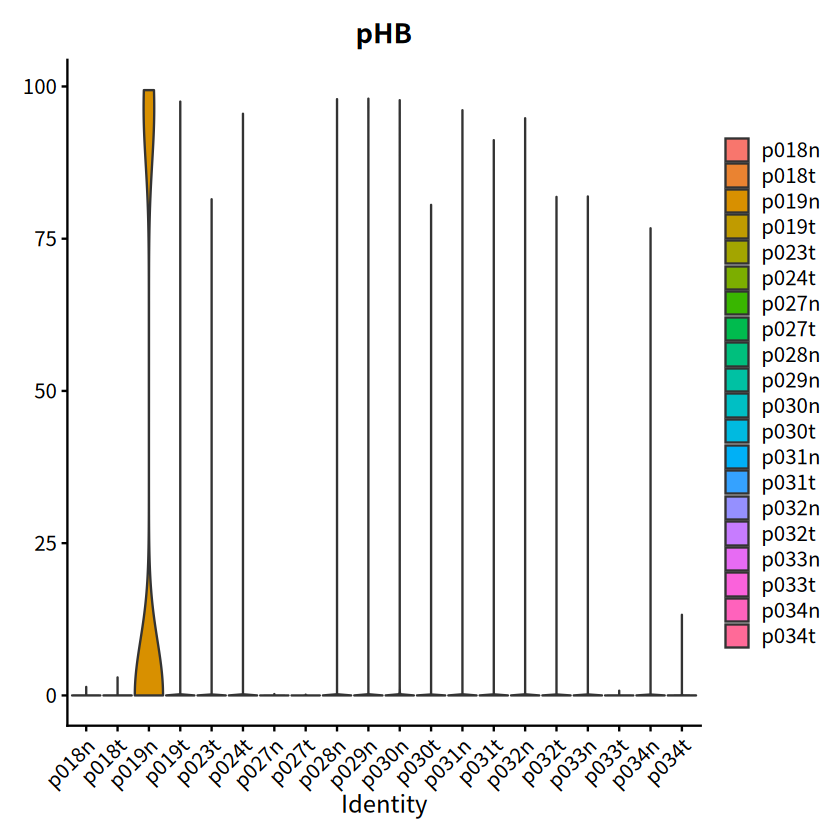

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Picking joint bandwidth of 203



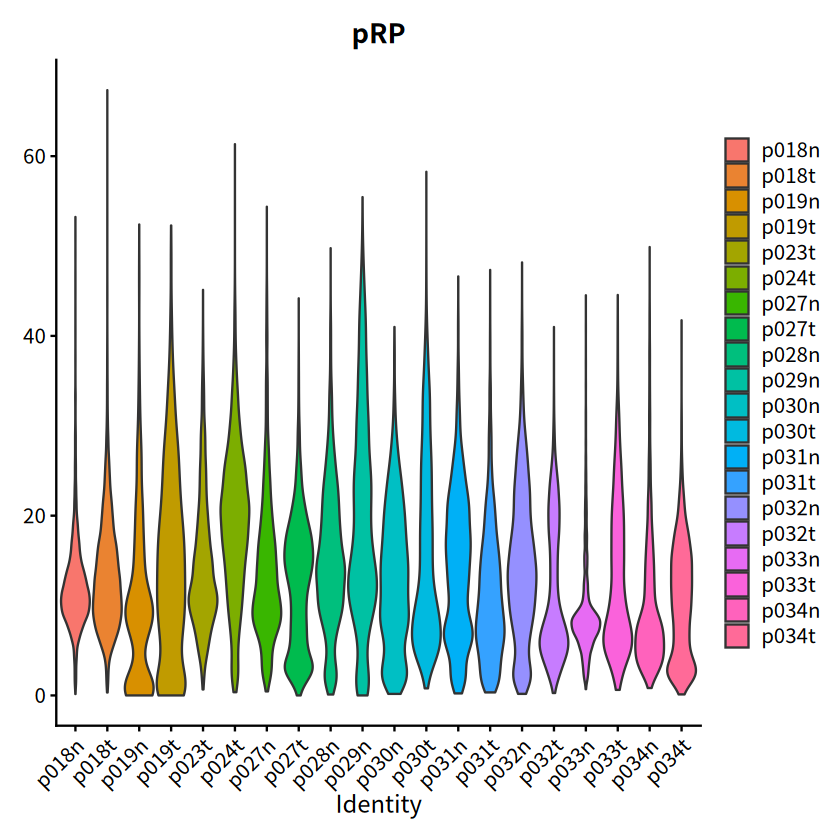

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Picking joint bandwidth of 1060



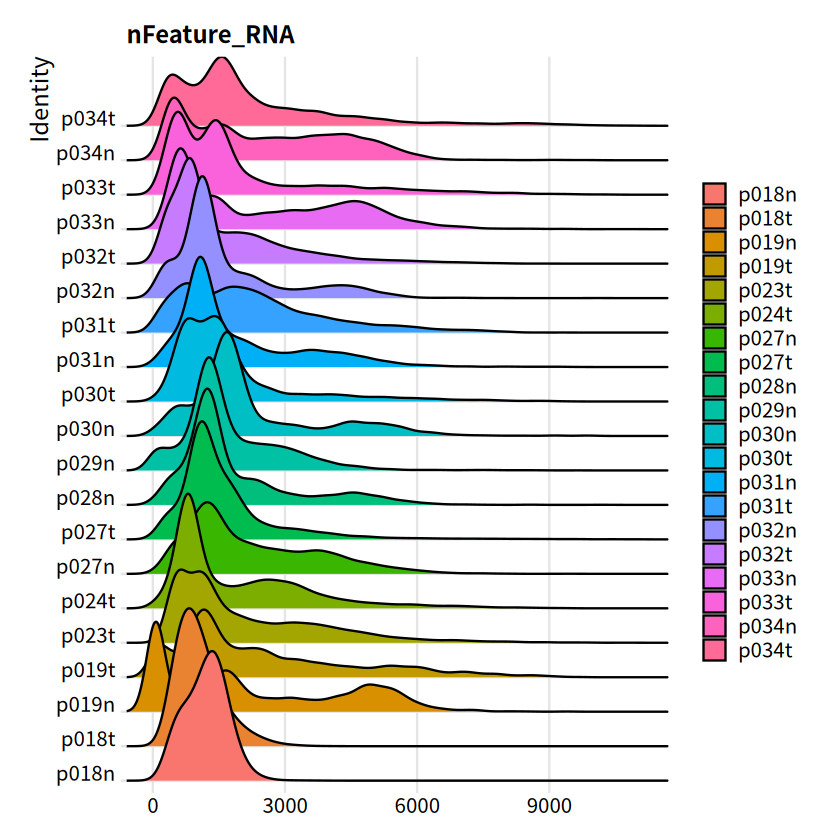

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Picking joint bandwidth of 0.906



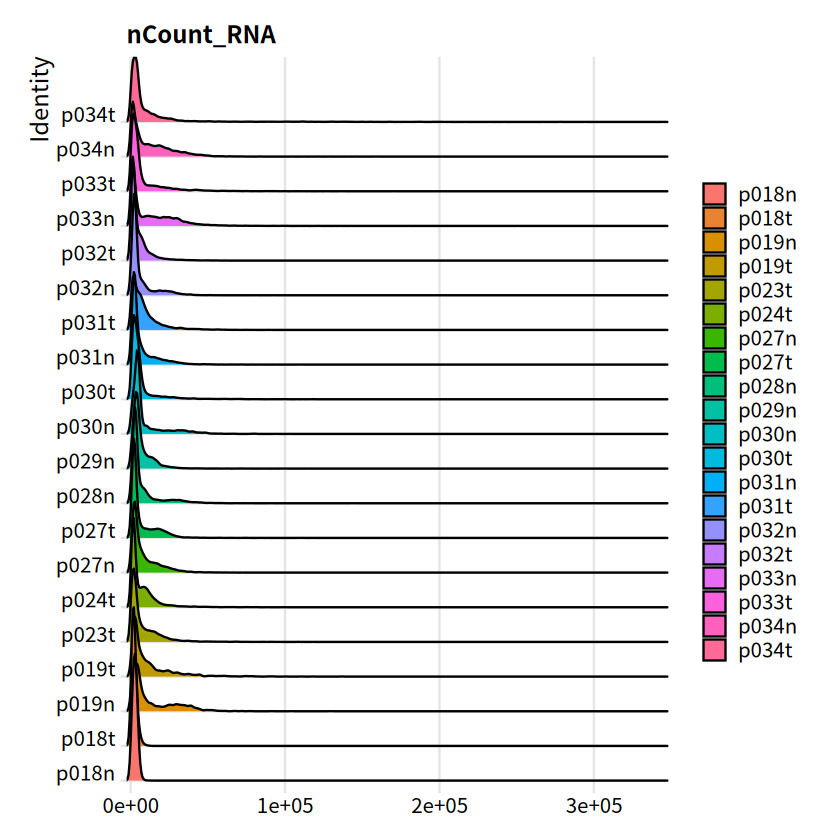

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Picking joint bandwidth of 0.447



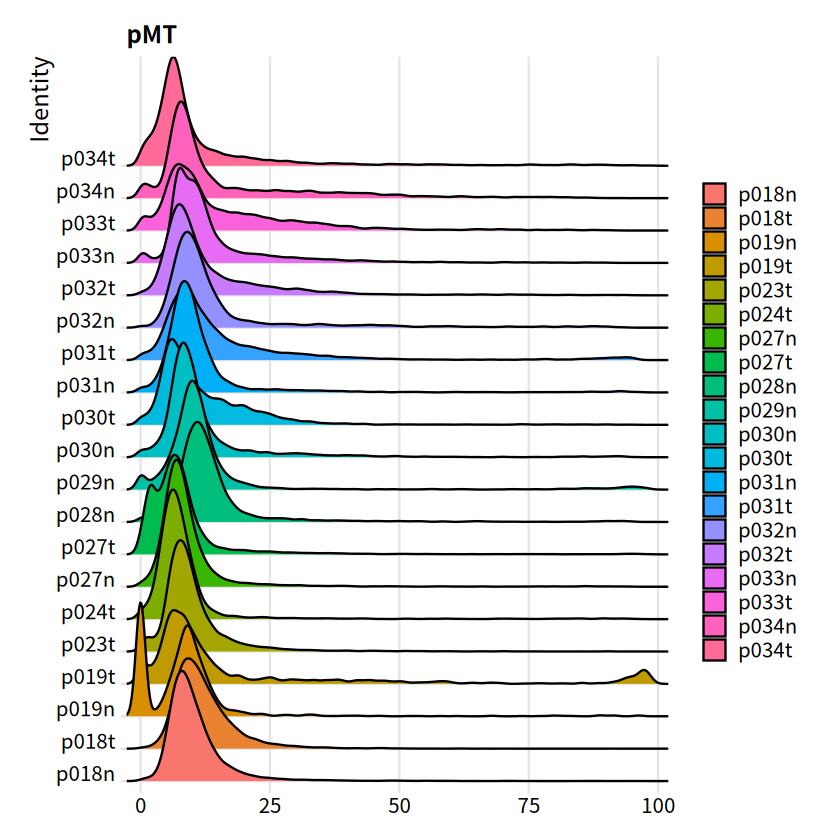

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Picking joint bandwidth of 1.22



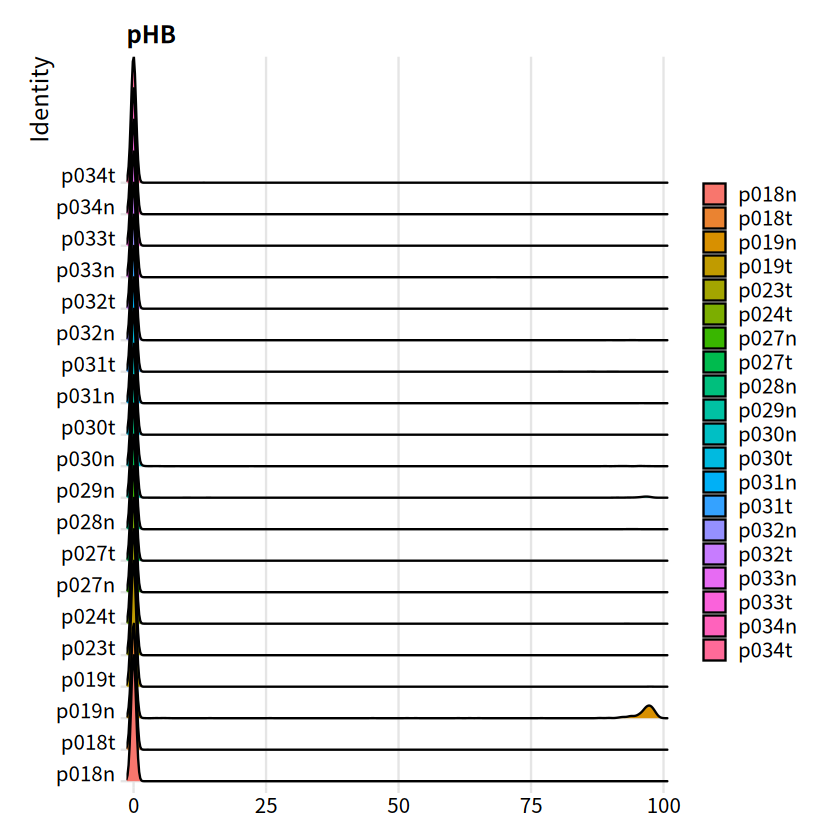

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”
Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



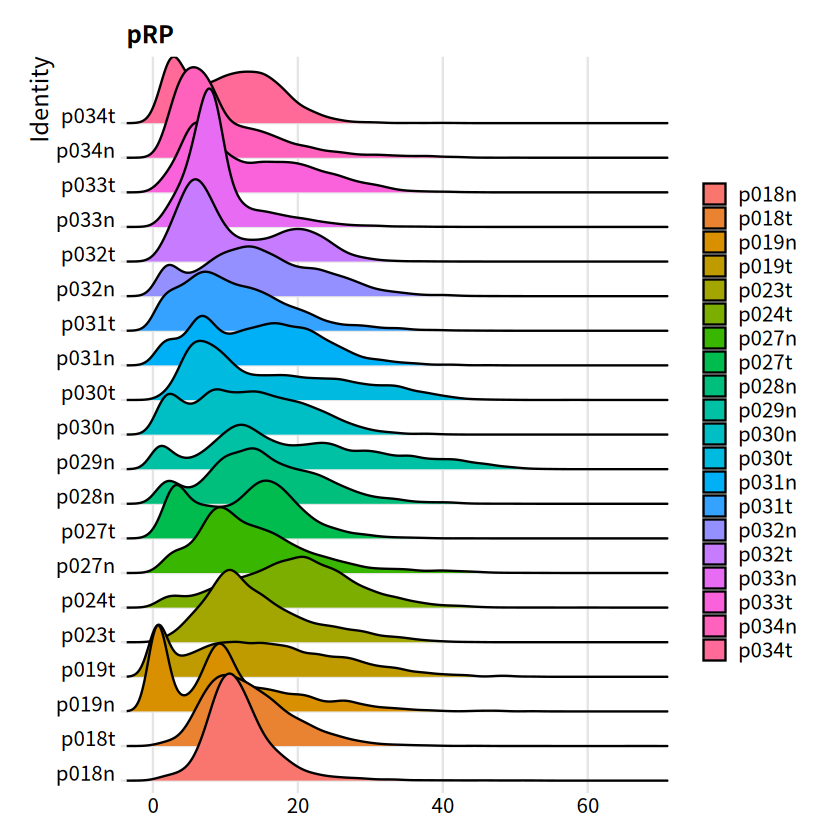

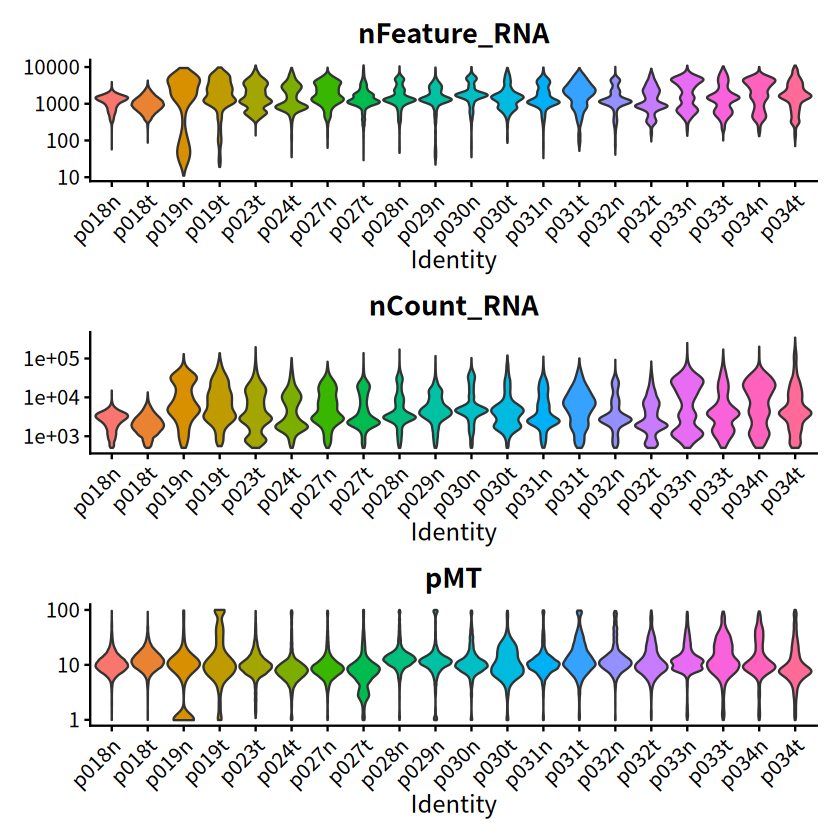

In [ ]:
qcparams <- c("nFeature_RNA", "nCount_RNA", "pMT", "pHB", "pRP")
for (i in seq_along(qcparams)){
  print(VlnPlot(object = seu_obj, features = qcparams[i], group.by = "orig.ident", pt.size = 0))
}
for (i in seq_along(qcparams)){
  print(RidgePlot(object = seu_obj, features = qcparams[i], group.by = "orig.ident"))
}

VlnPlot(seu_obj, features = c("nFeature_RNA", "nCount_RNA", "pMT"), pt.size = 0, group.by = "orig.ident", ncol = 1, log = T)
ggsave2("SuppFig1B.pdf", path = "../results", width = 30, height = 20, units = "cm")

In [6]:
### clear environment
remove(seu_obj1)
remove(seu_obj2)
remove(seu_obj3)
remove(seu_obj4)
remove(seu_obj5)
remove(seu_obj6)
remove(seu_obj7)
remove(seu_obj8)
remove(seu_obj9)
remove(seu_obj10)
remove(seu_obj11)
remove(seu_obj12)
remove(seu_obj13)
remove(seu_obj14)
remove(seu_obj15)
remove(seu_obj16)
remove(seu_obj17)
remove(seu_obj18)
remove(seu_obj19)
remove(seu_obj20)

remove(scs_data1)
remove(scs_data2)
remove(scs_data3)
remove(scs_data4)
remove(scs_data5)
remove(scs_data6)
remove(scs_data7)
remove(scs_data8)
remove(scs_data9)
remove(scs_data10)
remove(scs_data11)
remove(scs_data12)
remove(scs_data13)
remove(scs_data14)
remove(scs_data15)
remove(scs_data16)
remove(scs_data17)
remove(scs_data18)
remove(scs_data19)
remove(scs_data20)

gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,3740056,199.8,6418352,342.8,6418352,342.8
Vcells,374726029,2859.0,2124041288,16205.2,2654937527,20255.6


In [8]:
seu_obj_unfiltered = seu_obj

In [9]:
# saveRDS(seu_obj_unfiltered, "seurat_objects/all_unfiltered.rds")
qs_save(seu_obj_unfiltered, "seurat_objects/all_unfiltered.qs2")

In [16]:
seu_obj_unfiltered

An object of class Seurat 
26296 features across 133736 samples within 1 assay 
Active assay: RNA (26296 features, 0 variable features)
 1 layer present: counts

# Data Filtering 

In [24]:
seu_obj_unfiltered = qs_read("seurat_objects/all_unfiltered.qs2")
seu_obj_unfiltered

An object of class Seurat 
26296 features across 133736 samples within 1 assay 
Active assay: RNA (26296 features, 0 variable features)
 1 layer present: counts

Warning message:
“Graphs cannot be vertically aligned unless the axis parameter is set. Placing graphs unaligned.”
Warning message:
“Graphs cannot be horizontally aligned unless the axis parameter is set. Placing graphs unaligned.”


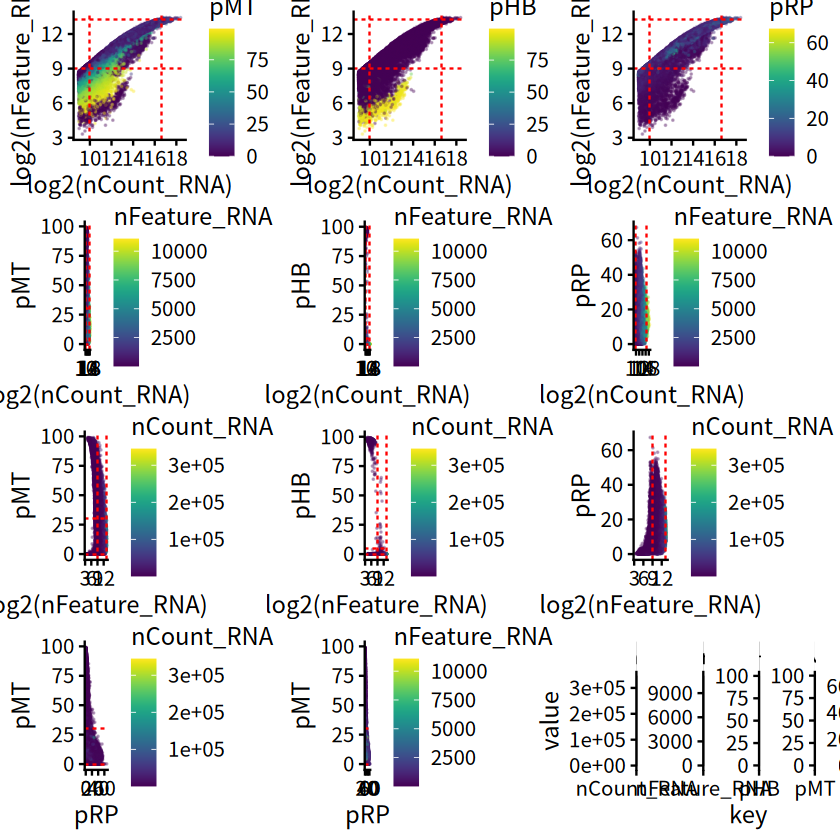

In [19]:
qc_std_plot_helper <- function(x) x + 
  scale_color_viridis() +
  geom_point(size = 0.01, alpha = 0.3)

qc_std_plot <- function(seu_obj) {
  qc_data <- as_tibble(FetchData(seu_obj, c("nCount_RNA", "nFeature_RNA", "pMT", "pHB", "pRP")))
  plot_grid(
    
    qc_std_plot_helper(ggplot(qc_data, aes(log2(nCount_RNA), log2(nFeature_RNA), color = pMT))) + 
      geom_hline(yintercept = log2(nFeature_lower), color = "red", linetype = 2) +
      geom_hline(yintercept = log2(nFeature_upper), color = "red", linetype = 2) +
      geom_vline(xintercept = log2(nCount_lower), color = "red", linetype = 2) +
      geom_vline(xintercept = log2(nCount_upper), color = "red", linetype = 2),
    qc_std_plot_helper(ggplot(qc_data, aes(log2(nCount_RNA), log2(nFeature_RNA), color = pHB))) + 
      geom_hline(yintercept = log2(nFeature_lower), color = "red", linetype = 2) +
      geom_hline(yintercept = log2(nFeature_upper), color = "red", linetype = 2) +
      geom_vline(xintercept = log2(nCount_lower), color = "red", linetype = 2) +
      geom_vline(xintercept = log2(nCount_upper), color = "red", linetype = 2),
    qc_std_plot_helper(ggplot(qc_data, aes(log2(nCount_RNA), log2(nFeature_RNA), color = pRP))) + 
      geom_hline(yintercept = log2(nFeature_lower), color = "red", linetype = 2) +
      geom_hline(yintercept = log2(nFeature_upper), color = "red", linetype = 2) +
      geom_vline(xintercept = log2(nCount_lower), color = "red", linetype = 2) +
      geom_vline(xintercept = log2(nCount_upper), color = "red", linetype = 2),
    
    qc_std_plot_helper(ggplot(qc_data, aes(log2(nCount_RNA), pMT, color = nFeature_RNA))) + 
      geom_hline(yintercept = pMT_lower, color = "red", linetype = 2) +
      geom_hline(yintercept = pMT_upper, color = "red", linetype = 2) +
      geom_vline(xintercept = log2(nCount_lower), color = "red", linetype = 2) +
      geom_vline(xintercept = log2(nCount_upper), color = "red", linetype = 2),
    qc_std_plot_helper(ggplot(qc_data, aes(log2(nCount_RNA), pHB, color = nFeature_RNA))) + 
      geom_hline(yintercept = pHB_lower, color = "red", linetype = 2) +
      geom_hline(yintercept = pHB_upper, color = "red", linetype = 2) +
      geom_vline(xintercept = log2(nCount_lower), color = "red", linetype = 2) +
      geom_vline(xintercept = log2(nCount_upper), color = "red", linetype = 2),
    qc_std_plot_helper(ggplot(qc_data, aes(log2(nCount_RNA), pRP, color = nFeature_RNA))) + 
      geom_vline(xintercept = log2(nCount_lower), color = "red", linetype = 2) +
      geom_vline(xintercept = log2(nCount_upper), color = "red", linetype = 2),
    
    
    qc_std_plot_helper(ggplot(qc_data, aes(log2(nFeature_RNA), pMT, color = nCount_RNA))) + 
      geom_hline(yintercept = pMT_lower, color = "red", linetype = 2) +
      geom_hline(yintercept = pMT_upper, color = "red", linetype = 2) +
      geom_vline(xintercept = log2(nFeature_lower), color = "red", linetype = 2) +
      geom_vline(xintercept = log2(nFeature_upper), color = "red", linetype = 2),
    qc_std_plot_helper(ggplot(qc_data, aes(log2(nFeature_RNA), pHB, color = nCount_RNA))) + 
      geom_hline(yintercept = pHB_lower, color = "red", linetype = 2) +
      geom_hline(yintercept = pHB_upper, color = "red", linetype = 2) +
      geom_vline(xintercept = log2(nFeature_lower), color = "red", linetype = 2) +
      geom_vline(xintercept = log2(nFeature_upper), color = "red", linetype = 2),
    qc_std_plot_helper(ggplot(qc_data, aes(log2(nFeature_RNA), pRP, color = nCount_RNA))) + 
      geom_vline(xintercept = log2(nFeature_lower), color = "red", linetype = 2) +
      geom_vline(xintercept = log2(nFeature_upper), color = "red", linetype = 2),
    
    qc_std_plot_helper(ggplot(qc_data, aes(pRP, pMT, color = nCount_RNA))) + 
      geom_hline(yintercept = pMT_lower, color = "red", linetype = 2) +
      geom_hline(yintercept = pMT_upper, color = "red", linetype = 2),
    qc_std_plot_helper(ggplot(qc_data, aes(pRP, pMT, color = nFeature_RNA))) + 
      geom_hline(yintercept = pMT_lower, color = "red", linetype = 2) +
      geom_hline(yintercept = pMT_upper, color = "red", linetype = 2),
    
    
    ggplot(gather(qc_data, key, value), aes(key, value)) +
      geom_violin() +
      facet_wrap(~key, scales = "free", ncol = 5),
    
    ncol = 3, align = "hv"
  )
}

qc_std_plot(seu_obj_unfiltered)
ggsave("SuppFig1A.png", path = "../results", width = 30, height = 30, units = "cm")

In [27]:
## After filtering
# 在质量控制和过滤后产生了114，489个高质量的转录组，与原文完全一致

seu_obj <- subset(seu_obj_unfiltered, subset = nFeature_RNA > nFeature_lower & nFeature_RNA < nFeature_upper & nCount_RNA > nCount_lower & nCount_RNA < nCount_upper & pMT < pMT_upper & pHB < pHB_upper)

# qc_std_plot(seu_obj)

seu_obj_unfiltered
seu_obj

An object of class Seurat 
26296 features across 133736 samples within 1 assay 
Active assay: RNA (26296 features, 0 variable features)
 1 layer present: counts

An object of class Seurat 
26296 features across 114489 samples within 1 assay 
Active assay: RNA (26296 features, 0 variable features)
 1 layer present: counts

# Data SCTransform

In [ ]:
plan("multicore", workers =4)
options(future.globals.maxSize = 35*1024^3) 

In [ ]:
seu_obj <- SCTransform(seu_obj, verbose = T, vars.to.regress = c("nCount_RNA", "pMT"), conserve.memory = T)
# 在标准流程中，不需要在 vars.to.regress（添加额外的协变量，在第二个非正则化线性中回归的变量） 中添加 nCount_RNA，因为 SCTransform 已通过 GLM 模型隐式校正测序深度（细胞测序深度被用作广义线性模型中的协变量）。重复校正测序深度可能抹去真实的生物学差异，引入多重共线性。
# conserve.memory = T，分块处理数据，节省内存，代价是用时会变长，时间换空间

qs_save(seu_obj, "seurat_objects/all_SCTransform.qs2")

Running SCTransform on assay: RNA

Running SCTransform on layer: counts



vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

Variance stabilizing transformation of count matrix of size 25280 by 114489

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



# Cell cycle scoring

In [35]:
seu_obj = qs_read("seurat_objects/all_SCTransform.qs2")
seu_obj

An object of class Seurat 
51576 features across 114489 samples within 2 assays 
Active assay: SCT (25280 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA

In [ ]:
# add cell cycle, cc.genes loaded with Seurat

s.genes <- cc.genes$s.genes
g2m.genes <- cc.genes$g2m.genes

score_cc <- function(seu_obj) {
  seu_obj <- CellCycleScoring(seu_obj, s.genes, g2m.genes)
  seu_obj@meta.data$CC.Diff <- seu_obj@meta.data$S.Score - seu_obj@meta.data$G2M.Score
  return(seu_obj)
}
# https://satijalab.org/seurat/articles/cell_cycle_vignette.html
# 作为替代方案，我们建议回归 G2M 和 S 期评分之间的差异。这意味着将非循环细胞和循环细胞分开的信号将保持不变，但增殖细胞之间细胞周期阶段的差异（通常无趣）将从数据中回归

seu_obj <- score_cc(seu_obj)

# FeatureScatter(seu_obj, "G2M.Score", "S.Score", group.by = "Phase", pt.size = .1) +
#   coord_fixed(ratio = 1)

Warning message in PrepDR(object = object, features = features, verbose = verbose):
“The following 64 features requested have not been scaled (running reduction without them): MCM5, FEN1, MCM2, MCM4, RRM1, UNG, GINS2, DTL, PRIM1, UHRF1, MLF1IP, RFC2, RPA2, NASP, RAD51AP1, GMNN, WDR76, SLBP, CCNE2, UBR7, POLD3, MSH2, RAD51, CDC45, CDC6, EXO1, TIPIN, DSCC1, BLM, CASP8AP2, USP1, POLA1, CHAF1B, BRIP1, E2F8, NDC80, TACC3, FAM64A, CKAP2L, AURKB, BUB1, ANP32E, HJURP, CDCA3, HN1, TTK, CDC25C, KIF2C, RANGAP1, NCAPD2, CDCA2, CDCA8, ECT2, KIF23, AURKA, PSRC1, LBR, CKAP5, CTCF, NEK2, G2E3, GAS2L3, CBX5, CENPA”


Warning message in svd.function(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message in svd.function(A = t(x = object), nv = npcs, ...):
“did not converge--results might be invalid!; try increasing work or maxit”
Warning message:
“Requested number is larger than the number of available items (33). Setting to 33.”
Warning message:
“Requested number is larger than the number of available items (33). Setting to 33.”
Warning message:
“Requested number is larger than the number of available items (33). Setting to 33.”
Warning message:
“Requested number is larger than the number of available items (33). Setting to 33.”
Warning message:
“Requested number is larger than the number of available items (33). Setting to 33.”
PC_ 1 
Positive:  TOP2A, MKI67, CENPF, UBE2C, NUSAP1, HMGB2, TPX2, HMMR, TYMS, CDK1 
	   DLGAP5, CENPE, CCNB2, BIRC5, RRM2, NUF2 
Negative:  CDCA7, MCM6, TUBB4B, HELLS, PCNA, CKAP2, 

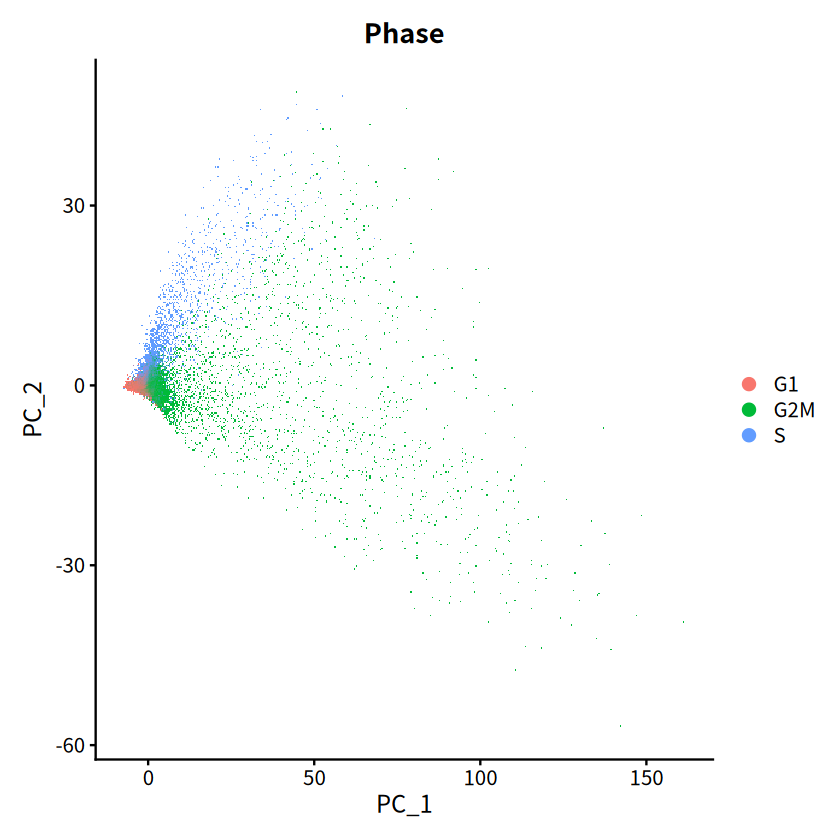

In [ ]:
seu_obj2 <- RunPCA(seu_obj, features = c(s.genes, g2m.genes))
DimPlot(seu_obj2, group.by = "Phase")
# 感觉需要对细胞周期进行回归，回归细胞周期后，使用相同基因集重新运行PCA。若G1、S、G2M在主成分上不再显著分离，说明校正有效。
ggsave("../output/cellcycle.png", dpi = 300, bg = "white")

In [52]:
qs_save(seu_obj, "seurat_objects/all_SCTransform_wo_CellCyclRegress.qs2")

In [ ]:
# 回归细胞周期（下次可以简单用 normalize 去查看是否需要回归细胞周期）
seu_obj <- SCTransform(seu_obj, verbose = T, vars.to.regress = c("pMT", "CC.Diff"))
qs_save(seu_obj, "seurat_objects/all_SCTransform_with_CellCyclRegress.qs2")

In [ ]:
seu_obj = qs_read("seurat_objects/all_SCTransform_with_CellCyclRegress.qs2")

Warning message in PrepDR(object = object, features = features, verbose = verbose):
“The following 64 features requested have not been scaled (running reduction without them): MCM5, FEN1, MCM2, MCM4, RRM1, UNG, GINS2, DTL, PRIM1, UHRF1, MLF1IP, RFC2, RPA2, NASP, RAD51AP1, GMNN, WDR76, SLBP, CCNE2, UBR7, POLD3, MSH2, RAD51, CDC45, CDC6, EXO1, TIPIN, DSCC1, BLM, CASP8AP2, USP1, POLA1, CHAF1B, BRIP1, E2F8, NDC80, TACC3, FAM64A, CKAP2L, AURKB, BUB1, ANP32E, HJURP, CDCA3, HN1, TTK, CDC25C, KIF2C, RANGAP1, NCAPD2, CDCA2, CDCA8, ECT2, KIF23, AURKA, PSRC1, LBR, CKAP5, CTCF, NEK2, G2E3, GAS2L3, CBX5, CENPA”


Warning message in svd.function(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message in svd.function(A = t(x = object), nv = npcs, ...):
“did not converge--results might be invalid!; try increasing work or maxit”
Warning message:
“Requested number is larger than the number of available items (33). Setting to 33.”
Warning message:
“Requested number is larger than the number of available items (33). Setting to 33.”
Warning message:
“Requested number is larger than the number of available items (33). Setting to 33.”
Warning message:
“Requested number is larger than the number of available items (33). Setting to 33.”
Warning message:
“Requested number is larger than the number of available items (33). Setting to 33.”
PC_ 1 
Positive:  MKI67, TOP2A, CENPF, TYMS, UBE2C, RRM2, NUSAP1, HMGB2, TPX2, CDK1 
	   CLSPN, PCNA, HMMR, DLGAP5, ATAD2, BIRC5 
Negative:  TUBB4B, CKS2, CKAP2, CDCA7, TMPO, MCM6, C

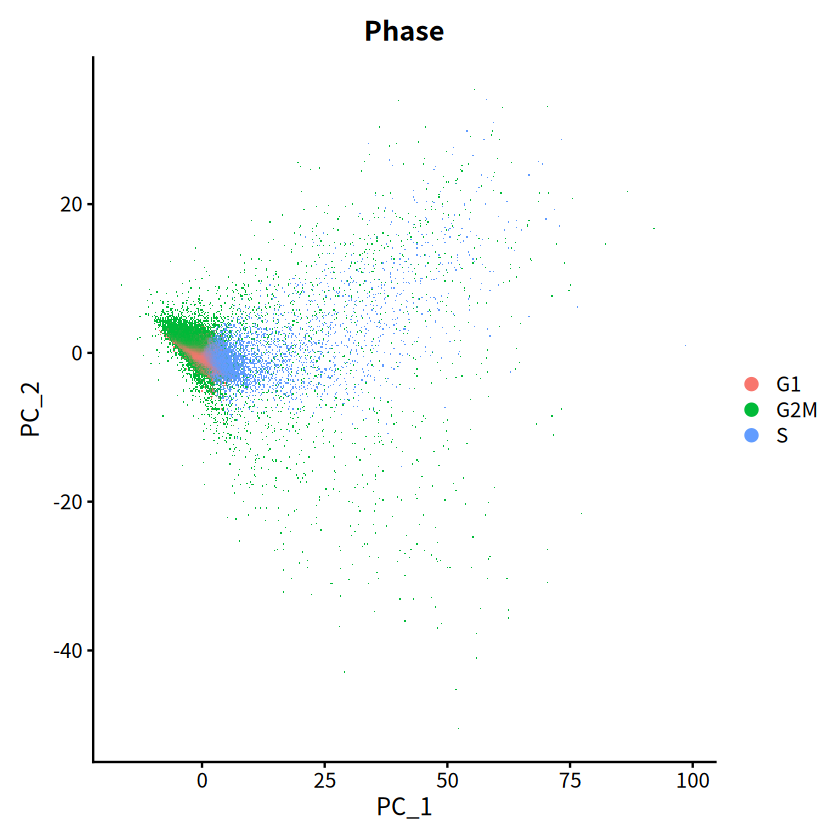

In [ ]:
# 回归细胞周期后，使用相同基因集重新运行PCA。若G1、S、G2M在主成分上不再显著分离，说明校正有效。
s.genes <- cc.genes$s.genes
g2m.genes <- cc.genes$g2m.genes
seu_obj <- RunPCA(seu_obj, features = c(s.genes, g2m.genes)) # 后面要重新 PCA
DimPlot(seu_obj, group.by = "Phase")
# 从图片上看，确实改善许多，效果比较温和

# Dimensionality reduction

In [2]:
seu_obj = qs_read("seurat_objects/all_SCTransform_with_CellCyclRegress.qs2")

In [ ]:
plan("multisession", workers =8)
options(future.globals.maxSize = 10*1024^3) # 每个线程分配 10 GB 运行内存

通过UMAP进行的分析和可视化显示，不同组织类型或患者的单细胞转录组混合在许多簇中，不包括一般批次效应，并且部分形成肿瘤或患者特异性簇，表明潜在的生物学差异，为了揭示哪些细胞区室最能解释患者间的变异性，我们分析了上皮、免疫和基质标记基因表达的单细胞转录组。总共涵盖了20，450个上皮细胞、89，766个免疫细胞和4273个基质单细胞转录组，如其他研究中所观察到的那样，免疫细胞转录组的代表性最高

PC_ 1 
Positive:  FTL, APOC1, APOE, LYZ, CCL18, FABP4, C1QB, CHIT1, C1QA, FTH1 
	   HLA-DRA, CTSD, CTSB, IL1B, SPP1, FN1, MARCO, S100A8, S100A9, C1QC 
	   MRC1, CXCL8, TYROBP, GPNMB, INHBA, HLA-DQA1, VIM, HLA-DRB1, CD74, CCL3 
Negative:  SCGB3A1, SFTPB, SCGB3A2, NAPSA, SFTPA1, SFTPA2, SLPI, PIGR, WFDC2, SFTPC 
	   C4BPA, MUC1, SFTA2, PGC, SFTPD, SLC34A2, ELF3, MGP, FOLR1, KRT19 
	   C16orf89, GPRC5A, AGR2, MUC5B, CEACAM6, CLDN18, HOPX, STEAP4, KRT18, TM4SF1 
PC_ 2 
Positive:  GNLY, NKG7, CCL5, CCL4, GZMB, GZMA, IGKC, KLRD1, PRF1, KLRB1 
	   CST7, CXCR4, IL32, FGFBP2, CD69, SPON2, TRBC1, GZMH, CD247, CD3D 
	   IFNG, IGHA1, CD7, IGLC2, CD2, KLRF1, CTSW, GZMK, TRAC, XCL2 
Negative:  FTL, APOC1, APOE, SCGB3A1, SFTPB, CCL18, LYZ, FABP4, C1QB, SFTPA1 
	   CHIT1, C1QA, SCGB3A2, SFTPA2, NAPSA, HLA-DRA, FTH1, SFTPC, CTSD, CTSB 
	   FN1, CXCL8, SLPI, S100A9, CCL20, SPP1, MARCO, CD74, PIGR, SFTPD 
PC_ 3 
Positive:  SPARCL1, MGP, IGFBP7, DCN, LUM, COL1A2, FBLN1, CALD1, TIMP3, COL3A1 
	   CCDC80, S

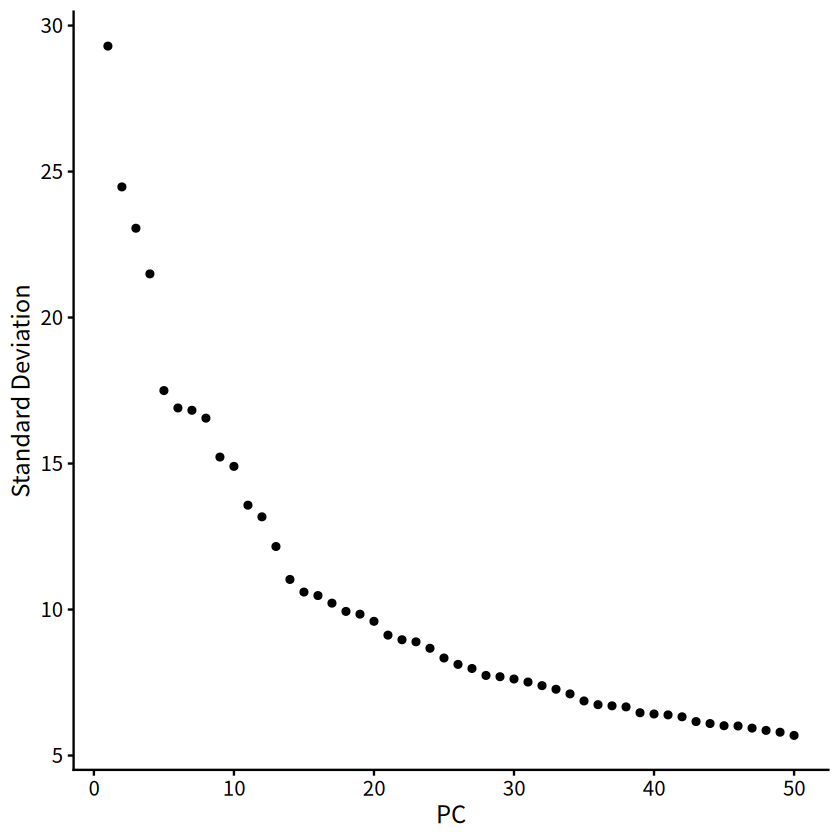

In [5]:
seu_obj <- RunPCA(seu_obj)
ElbowPlot(seu_obj, ndims = 50)

In [ ]:
# umap test

# for (i in c(15, 20)) {
#  umaptest <- RunUMAP(seu_obj, dims = 1:i, verbose = F)
#  print(DimPlot(umaptest, reduction = "umap", group.by = "orig.ident") + labs(title = paste0(i, " dimensions")))
#  print(FeaturePlot(umaptest, features = c("EPCAM", "PTPRC"), order = T))
#  print(FeaturePlot(umaptest, features = c("MARCO", "KIT"), order = T))
#  print(FeaturePlot(umaptest, features = c("FOXJ1", "AGER"), order = T))
#  print(FeaturePlot(umaptest, features = c("JCHAIN", "VWF"), order = T))
#  remove(umaptest)
# }

# order=T 将表达的细胞移动到非表达的细胞前面，如果表达给定特征的细胞被覆盖，则可能很有用，主要是这里细胞实在太多了，细胞数量少一些估计没什么关系

In [ ]:
#前15个主成分被用来构建SNN图和UMAP嵌入
seu_obj <- RunUMAP(seu_obj, dims = 1:15, verbose = F) 
seu_obj <- FindNeighbors(seu_obj, dims = 1:15)
seu_obj <- FindClusters(
  object = seu_obj,
  resolution = c(seq(0.1, 0.5, 0.1),1)
  #algorithm = 4,
  #random.seed = 1
)

#library(clustree)
#clustree(seu_obj@meta.data, prefix = "SCT_snn_res.") #   RNA_snn_res.
#ggsave("output/annotation/MainClusterTree2.png",dpi = 300, width = 10, height = 6)

# 会在 metadata 中生成 SCT_snn_res.0.2，SCT_snn_res.0.3等数据
# 结果将存储在metadata 的 'seurat_clusters' 。每次运行 FindCluster 时，“seurat_clusters”都会被覆盖

Computing nearest neighbor graph



Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 114489
Number of edges: 3663495

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9779
Number of communities: 16
Elapsed time: 33 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 114489
Number of edges: 3663495

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9672
Number of communities: 22
Elapsed time: 38 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 114489
Number of edges: 3663495

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9580
Number of communities: 23
Elapsed time: 37 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 114489
Number of edges: 3663495

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9526
Number of communities: 28
Elapsed time: 29 seconds


In [ ]:
for (i in c(seq(0.1, 0.5, 0.1))) {
  #seu_obj <- FindClusters(seu_obj, resolution = i) 
  print(DimPlot(seu_obj, reduction = "umap", group.by = paste0("SCT_snn_res.", i)) + labs(title = paste0("resolution: ", i)))
}

In [ ]:
# 根据 feature 对降维图上的每个细胞着色
# feature 可能来自An Assay feature (e.g. a gene name - "MS4A1")，A column name from meta.data (e.g. mitochondrial percentage - "percent.mito")
for (i in c("nFeature_RNA", "nCount_RNA", "pMT", "pHB", "pRP")) {
  print(FeaturePlot(seu_obj, features = i, coord.fixed = T, order = T))
}

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



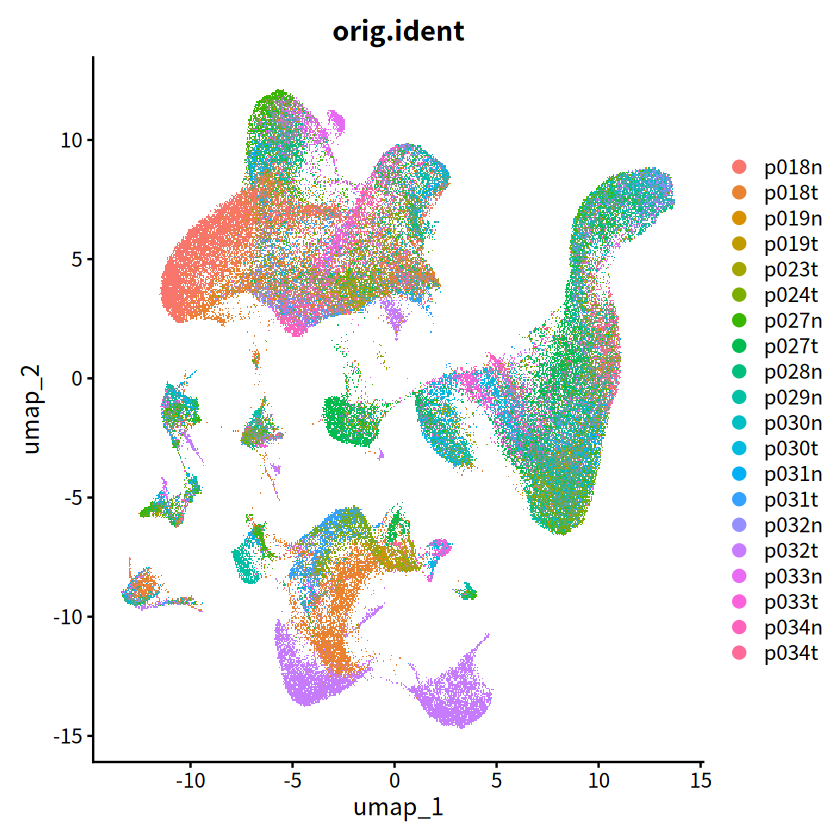

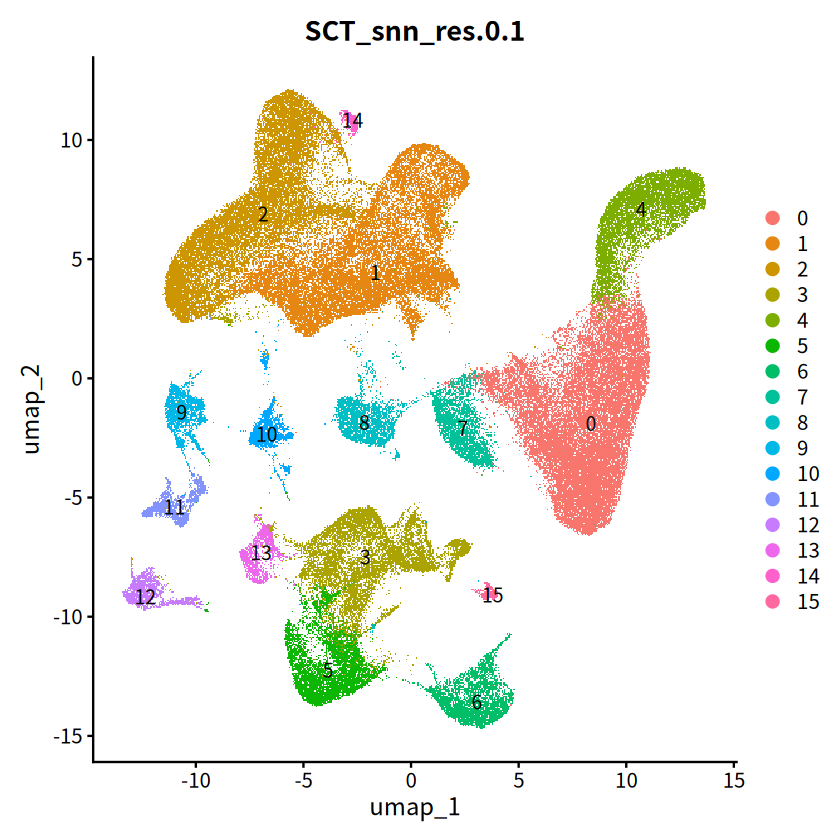

In [12]:
# 查看样本是否按批次聚类，而不是按生物学类型。
DimPlot(seu_obj, group.by = "orig.ident")
DimPlot(seu_obj, group.by = "SCT_snn_res.0.1", label = T)

# Main cell type annotation

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



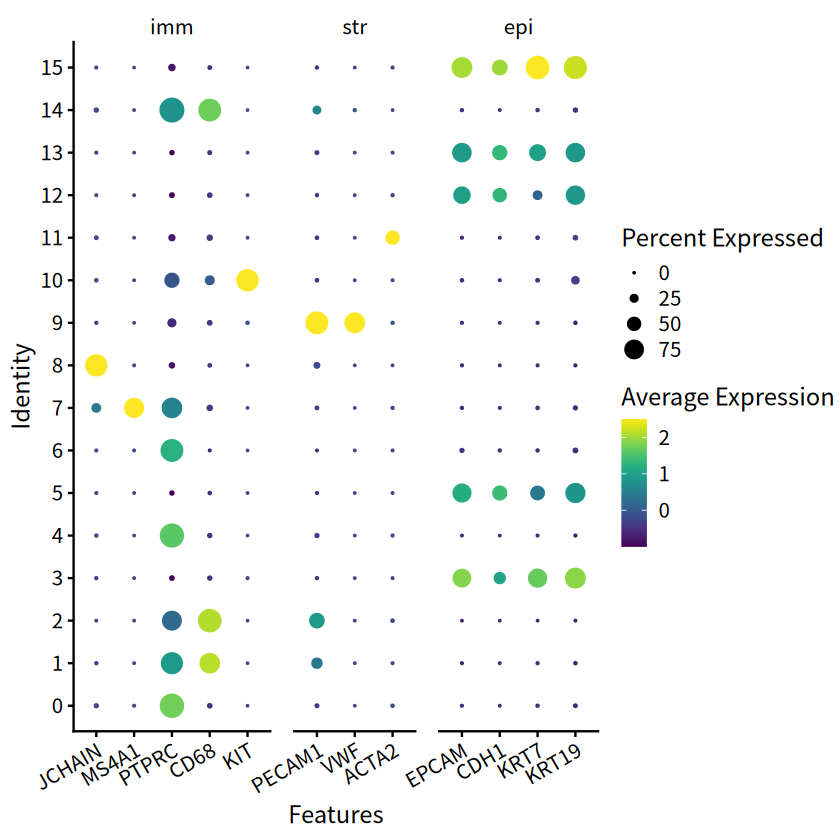

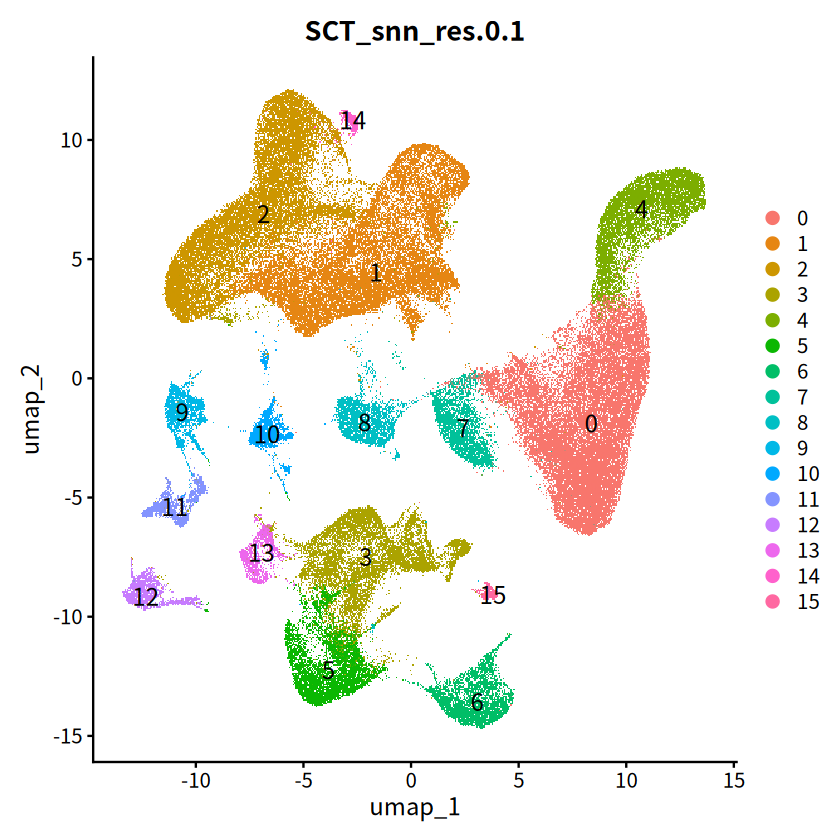

In [15]:
mainmarkers = list(
  "imm" = c("JCHAIN", "MS4A1", "PTPRC", "CD68", "KIT"),
  "str" = c("PECAM1", "VWF", "ACTA2"),
  "epi" = c("EPCAM", "CDH1", "KRT7", "KRT19")
)

# for (i in seq_along(mainmarkers)) {
#   FeaturePlot(seu_obj, features = mainmarkers[i], coord.fixed = T, order = T, cols = viridis(10))
#   ggsave2(paste0("FeaturePlot_mainmarkers_", mainmarkers[i], ".png"), path = "output/annotation", width = 10, height = 10, units = "cm")
# }

DotPlot(seu_obj, features = mainmarkers, group.by = "SCT_snn_res.0.1") + 
  # coord_flip() + 
  scale_color_viridis()+
  theme(axis.text.x = element_text(angle = 30, hjust = 1))
#ggsave("DotPlot_mainmarkers01_lo.png", path = "../output/annotation", width = 20, height = 15, units = "cm", bg = "white")

DimPlot(seu_obj, group.by = "SCT_snn_res.0.1", label = T, label.size = 5)
#ggsave("DimPlot_all_clusters01.png", path = "../output/annotation", width = 20, height = 20, units = "cm", bg = "white")

还是需要结合 findallmarekr 的，但是先跑通再说

In [16]:
# 在 excel中书写手动注释结果，然后写入 seurat metadata
Idents(seu_obj) <- seu_obj$SCT_snn_res.0.1
annotation_curated_main <- read_excel("../data/curated_annotation/curated_annotation_main.xlsx",sheet = "my_0.1")
new_ids_main <- annotation_curated_main$main_cell_type
names(new_ids_main) <- levels(seu_obj)
seu_obj <- RenameIdents(seu_obj, new_ids_main)
seu_obj@meta.data$main_cell_type <- Idents(seu_obj)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



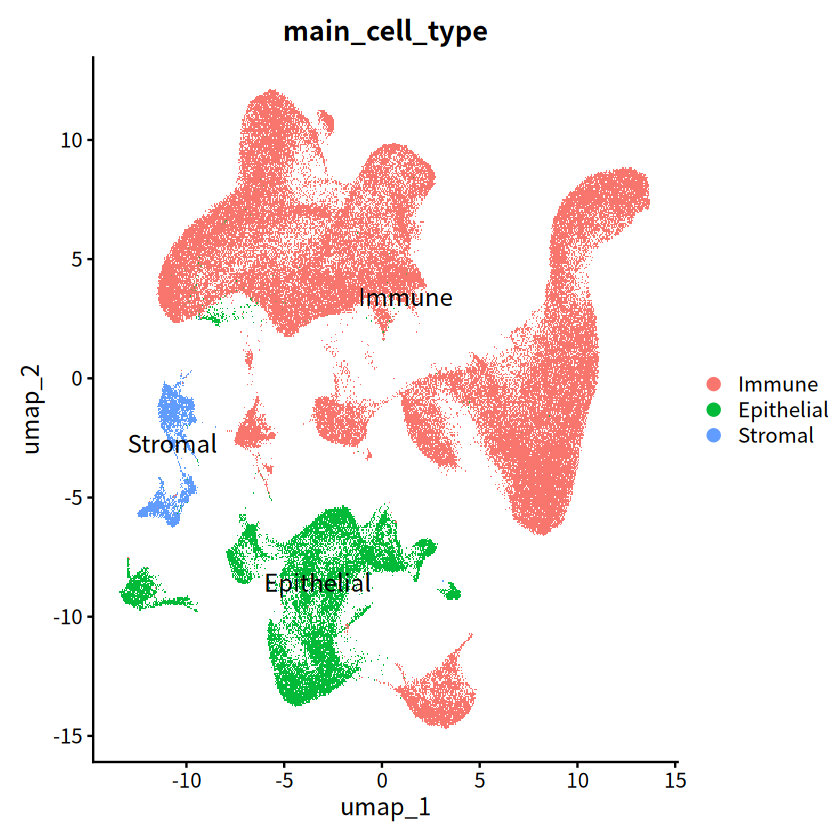

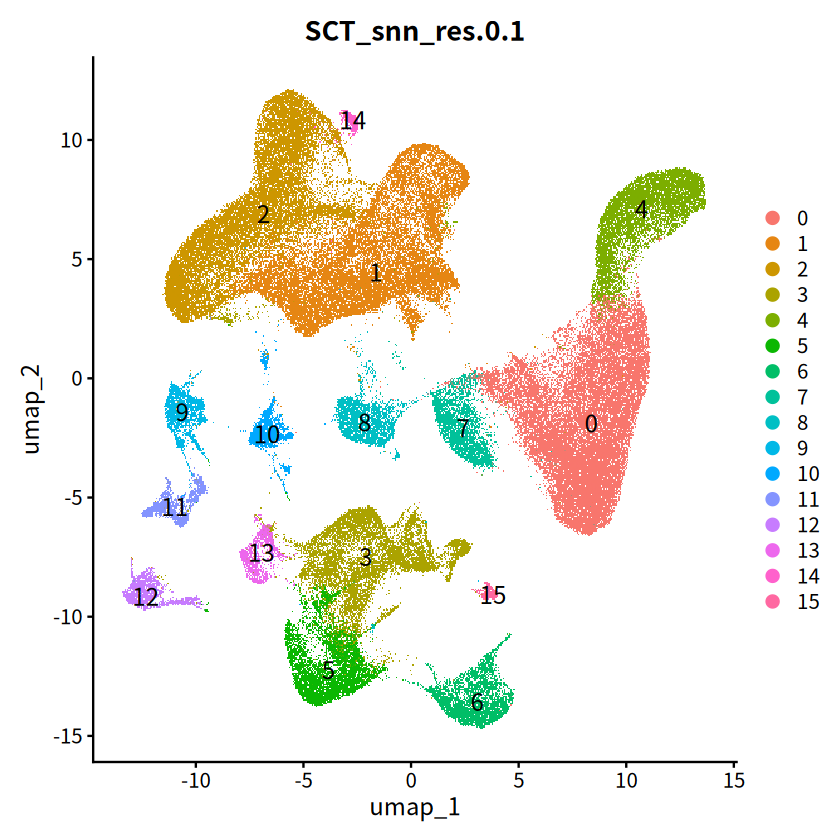

In [19]:
DimPlot(seu_obj, group.by = "main_cell_type", label = T, label.size = 5)
DimPlot(seu_obj, group.by = "SCT_snn_res.0.1", label = T, label.size = 5)

In [20]:
# 查看注释情况是否正确
seu_obj@meta.data |>select(SCT_snn_res.0.1, main_cell_type) |> distinct(SCT_snn_res.0.1, .keep_all = TRUE)

,SCT_snn_res.0.1,main_cell_type
,<fct>,<fct>
p018t_AAACCCAAGAGAGCCT-1,2,Immune
p018t_AAACCCAAGGACTTCT-1,5,Epithelial
p018t_AAACCCACAAAGGCTG-1,1,Immune
p018t_AAACCCAGTATCGCTA-1,3,Epithelial
p018t_AAACCCAGTCTCTCCA-1,12,Epithelial
p018t_AAACCCATCGTTGCCT-1,11,Stromal
p018t_AAACCCATCTTCCTAA-1,9,Stromal
p018t_AAACGAAGTCTCCCTA-1,10,Immune
p018t_AACAAAGTCAGCATTG-1,7,Immune


Idents本质上是元数据中某一列的快捷方式。例如，Idents(seu_obj) <- seu_obj$SCT_snn_res.0.2等价于直接操作seu_obj@meta.data$SCT_snn_res.0.2，但通过Idents接口更加简洁和安全。

# Add metadata

In [21]:
metatable <- read_excel("../data/metadata/patients_metadata.xlsx")

metadata <- FetchData(seu_obj, "orig.ident")
metadata$cell_id <- rownames(metadata)
metadata$sample_id <- metadata$orig.ident
metadata <- left_join(x = metadata, y = metatable, by = "sample_id")
rownames(metadata) <- metadata$cell_id

seu_obj <- AddMetaData(seu_obj, metadata = metadata)

In [24]:
seu_obj@meta.data |> str()

'data.frame':	114489 obs. of  34 variables:
 $ orig.ident     : chr  "p018t" "p018t" "p018t" "p018t" ...
 $ nCount_RNA     : num  6432 1583 2603 2077 2637 ...
 $ nFeature_RNA   : int  2439 843 1188 1011 1213 1848 1486 1954 923 1118 ...
 $ pMT            : num  15.73 8.97 17.06 7.94 7.81 ...
 $ pHB            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ pRP            : num  11.44 15.35 12.41 11.8 5.84 ...
 $ nCount_SCT     : num  2549 1890 2403 2100 2428 ...
 $ nFeature_SCT   : int  1461 843 1188 1011 1213 1712 1481 1824 923 1118 ...
 $ S.Score        : num  0.0151 -0.0246 -0.0221 -0.0146 0.0141 ...
 $ G2M.Score      : num  0.00729 -0.00544 0.00677 -0.01666 -0.02254 ...
 $ Phase          : chr  "S" "G1" "G2M" "G1" ...
 $ CC.Diff        : num  0.00782 -0.01918 -0.02887 0.00209 0.03663 ...
 $ SCT_snn_res.0.1: Factor w/ 16 levels "0","1","2","3",..: 3 3 6 2 3 3 6 3 2 3 ...
 $ SCT_snn_res.0.2: Factor w/ 22 levels "0","1","2","3",..: 3 3 7 2 3 3 7 3 2 3 ...
 $ SCT_snn_res.0.3: Factor w/ 23 levels "0",

# Subset, rescale and save 

In [25]:
qs_save(seu_obj, file = "seurat_objects/all.qs2")

In [26]:
plan("multisession", workers =4)
options(future.globals.maxSize = 15*1024^3) 

In [27]:
# 注意到 SCTTransform 的结果是有保存count、data 的（反推的）
# normalize是取对数等操作，基于单元格，不用重新做，但是 scale 操作是基于基因的，所以要重新做，但是 SCT 反推出来的东西靠谱吗？

Idents(seu_obj) <- seu_obj@meta.data$main_cell_type

# 独立分析子集
epi <- subset(seu_obj, idents = "Epithelial")
imm <- subset(seu_obj, idents = "Immune")
str <- subset(seu_obj, idents = "Stromal")

# epi = SCTransform(epi, verbose = T, vars.to.regress = c("nCount_RNA", "pMT"), conserve.memory = T)
# imm = SCTransform(imm, verbose = T, vars.to.regress = c("nCount_RNA", "pMT"), conserve.memory = T)
# str = SCTransform(str, verbose = T, vars.to.regress = c("nCount_RNA", "pMT"), conserve.memory = T)

epi <- ScaleData(epi)
imm <- ScaleData(imm)
str <- ScaleData(str)

epi 
imm 
str 

qs_save(epi, file = "seurat_objects/epi.qs2")# 上皮细胞
qs_save(imm, file = "seurat_objects/imm.qs2")# 免疫细胞
qs_save(str, file = "seurat_objects/str.qs2")# 基质细胞

Centering and scaling data matrix

Centering and scaling data matrix

Centering and scaling data matrix



An object of class Seurat 
51576 features across 20610 samples within 2 assays 
Active assay: SCT (25280 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

An object of class Seurat 
51576 features across 89644 samples within 2 assays 
Active assay: SCT (25280 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

An object of class Seurat 
51576 features across 4235 samples within 2 assays 
Active assay: SCT (25280 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

# Plots for figure 1

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



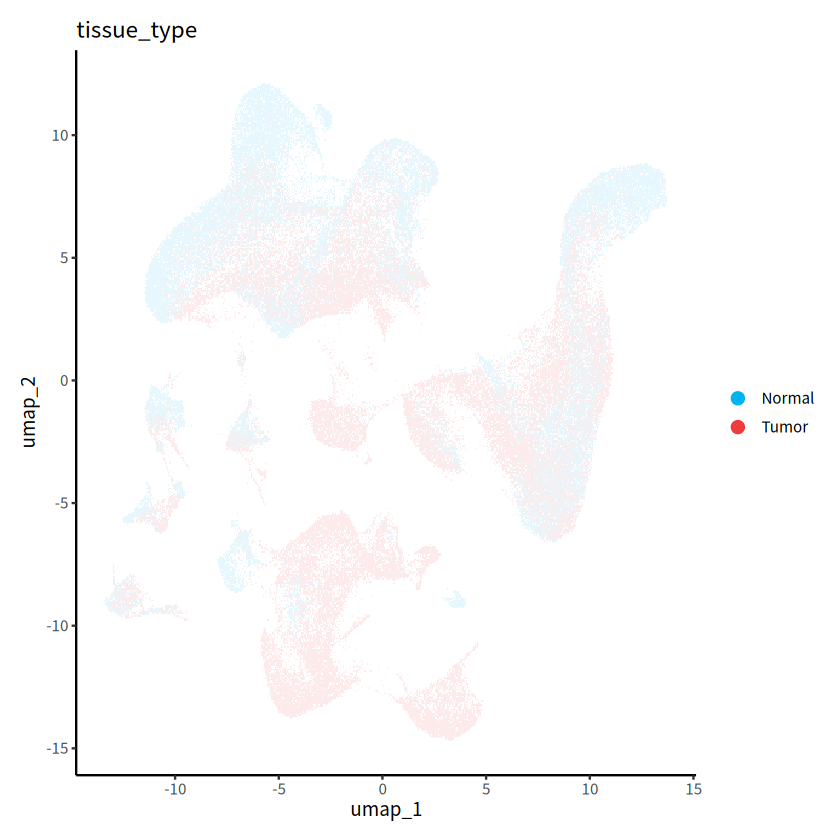

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



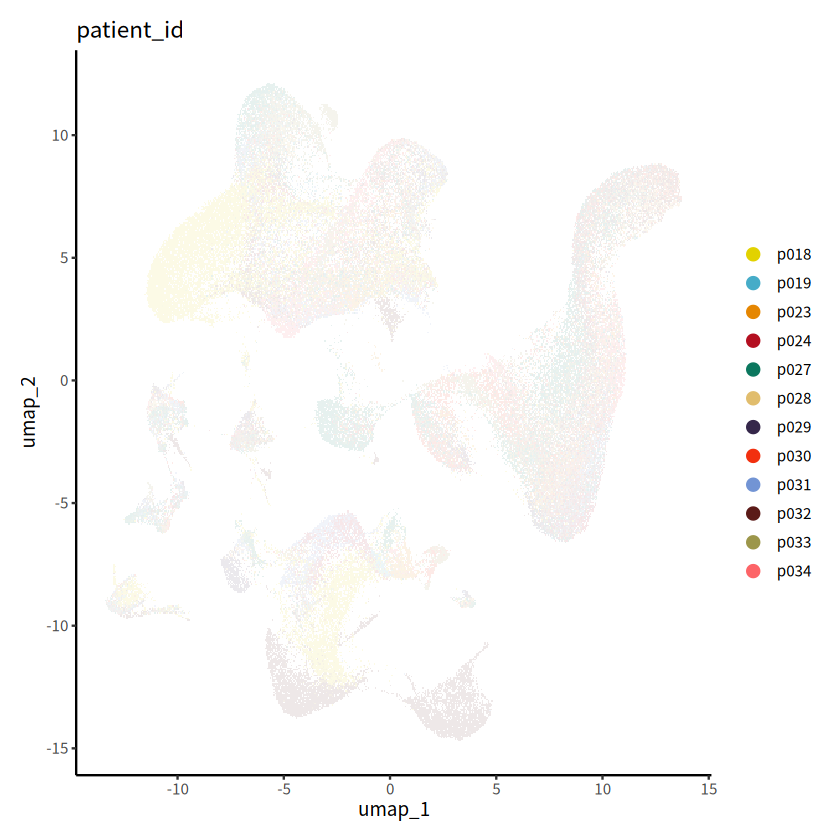

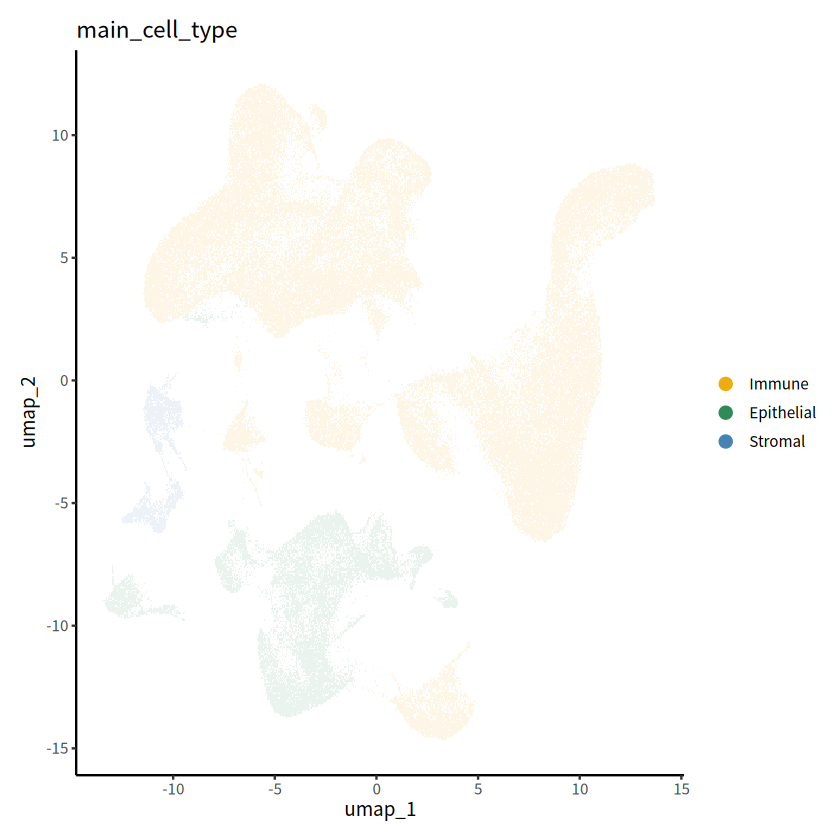

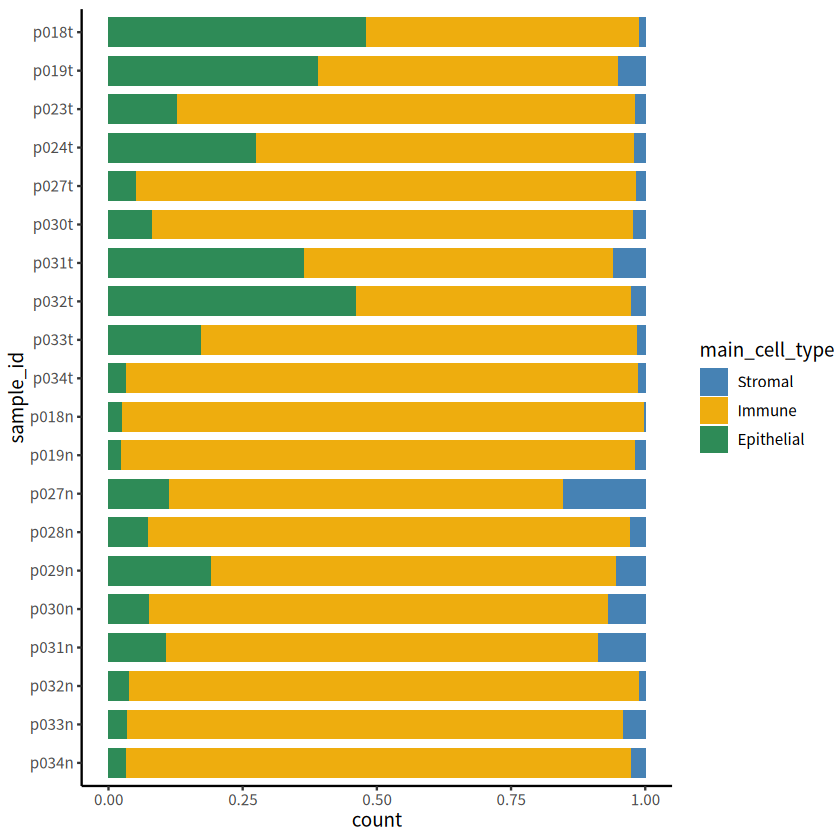

In [30]:
###r plots for figure 1

DimPlot(seu_obj, group.by = "tissue_type", cols = use_colors, pt.size = 0.1, order = T)+
  theme_classic()
ggsave("Fig1B.png", path = "../results", width = 15, height = 15, units = "cm")

DimPlot(seu_obj, group.by = "patient_id", cols = use_colors, pt.size = 0.1)+
  theme_classic()
ggsave("Fig1C.png", path = "../results", width = 15, height = 15, units = "cm")

DimPlot(seu_obj, group.by = "main_cell_type", cols = use_colors, pt.size = 0.1)+
  theme_classic()
ggsave("Fig1D_umap.png", path = "../results", width = 15, height = 15, units = "cm")

cell_types <- FetchData(seu_obj, vars = c("sample_id", "main_cell_type", "tissue_type")) %>% 
  mutate(main_cell_type = factor(main_cell_type, levels = c("Stromal", "Immune", "Epithelial"))) %>% 
  mutate(sample_id = factor(sample_id, levels = rev(c("p018t", "p019t", "p023t", "p024t", "p027t", "p028t", "p030t", "p031t", "p032t", "p033t", "p034t", "p018n", "p019n", "p027n", "p028n", "p029n", "p030n", "p031n", "p032n", "p033n", "p034n"))))

ggplot(data = cell_types) + 
  geom_bar(mapping = aes(x = sample_id, fill = main_cell_type, ), position = "fill", width = 0.75) +
  scale_fill_manual(values = use_colors) +
  coord_flip()+
  theme_classic()
ggsave("Fig1D_barplot.pdf", path = "../results", width = 15, height = 30, units = "cm")

# clean

In [31]:
rm(list = ls())
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,4099560,219.0,6505191,347.5,6505191,347.5
Vcells,8354520,63.8,3342985227,25505.0,3480207835,26551.9
